In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
train=pd.read_csv(r"file:///C:\Users\HIMANSHU%20SHARMA\Desktop\train.csv")
test= pd.read_csv(r"file:///E:\Practice%20dataset\titanic\test.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.shape
test.shape

(418, 11)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

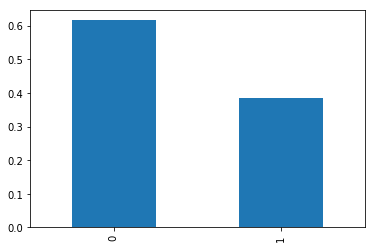

In [21]:
train["Survived"].value_counts(normalize=True).plot.bar()

Text(0.5,1,'Sex vs Survived')

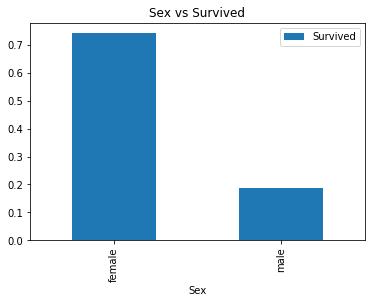

In [22]:
####DATA Visualization##########
train[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar()
plt.title("Sex vs Survived")

Text(0.5,1,'Sex:survived vs alive')

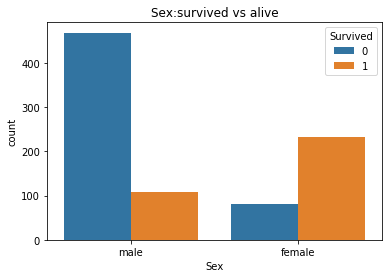

In [24]:
sns.countplot("Sex",hue="Survived",data=train)
plt.title("Sex:survived vs alive")

Text(0.5,1,'Number of passenger by class')

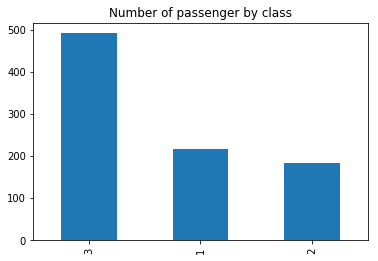

In [25]:
train["Pclass"].value_counts().plot.bar()
plt.title("Number of passenger by class")

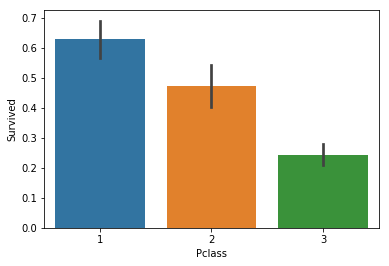

In [26]:
####Pclass features
sns.barplot(x="Pclass" ,y="Survived",data=train)

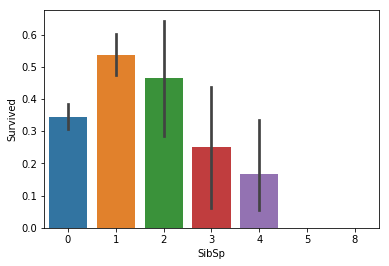

In [28]:
#####Sibsp features
sns.barplot(x="SibSp",y="Survived",data=train)

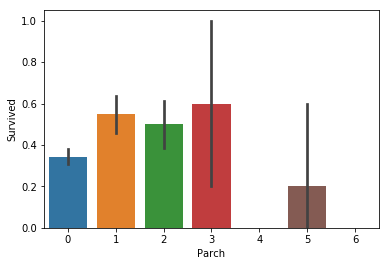

In [29]:
####Parch Features
sns.barplot(x="Parch",y="Survived",data=train)

In [35]:
train["Age"].mean(skipna=True)

29.69911764705882

In [34]:
train["Age"].median(skipna=True)

28.0

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


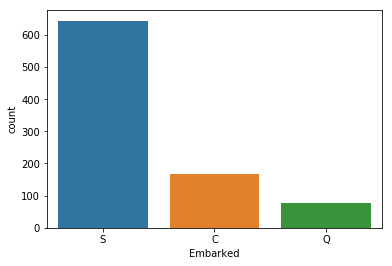

In [39]:
####Now looking over the missing value of Embarked#######
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train)
plt.show()

In [41]:
train_data = train.copy()

In [42]:
####Now handling the missing value in the variables###
####for age we will fill with the median value 
train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

In [48]:
######As we can see in the above by far the most passenger in southaampton,so we will fill the missing values of embarked with S
train_data["Embarked"].fillna(train["Embarked"].value_counts().idxmax(),inplace=True)

In [44]:
####and finally in the cabin the missing value are in large numbr,so it is better to drop this variables
train_data.drop('Cabin', axis=1, inplace=True)

In [49]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
###creating a categorical variable and dropping some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

In [56]:
training.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [54]:
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

In [58]:
####now aplying the same changes on the test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
test_data = test.copy()

In [62]:
test_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

In [63]:
test_data["Fare"].fillna(train["Fare"].median(skipna=True), inplace=True)

In [64]:
test_data.drop('Cabin', axis=1, inplace=True)

In [65]:
test_data.drop('SibSp', axis=1, inplace=True)

In [66]:
test_data.drop('Parch', axis=1, inplace=True)

In [67]:
testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])

In [ ]:
testing.drop('PassengerId', axis=1, inplace=True)

In [70]:
testing.drop('Name', axis=1, inplace=True)

In [71]:
testing.drop('Ticket', axis=1, inplace=True)

In [72]:
final_test = testing
final_test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.5,7.8292,0,0,1,0,1,0,0,1
1,47.0,7.0000,0,0,1,0,0,1,1,0
2,62.0,9.6875,0,1,0,0,1,0,0,1
3,27.0,8.6625,0,0,1,0,0,1,0,1
4,22.0,12.2875,0,0,1,0,0,1,1,0


In [78]:
X = training.drop("Survived", axis=1)
y = training["Survived"]

In [76]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
randomfpredictor = clf.predict(X_test)
sc0=accuracy_score(y_true=y_test, y_pred=randomfpredictor)
print("Accuracy Score: ", accuracy_score(y_true=y_test, y_pred=randomfpredictor))

Accuracy Score:  0.843575418994


In [91]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
survived = reg.predict(X_test)
sc1=round(accuracy_score(y_true=y_test, y_pred=survived)*100,2)
print(sc1)
##print("Accuracy Score: ", round(accuracy_score(y_true=y_test, y_pred=survived))*100

79.89


In [96]:
ids = test['PassengerId']
predictions = reg.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

ValueError: could not convert string to float: 'C'